<a href="https://colab.research.google.com/github/MatthewR2D2/Tensorflow2Examples/blob/master/Tensorflow2ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 79.7MB/s 
     |████████████████████████████████| 419kB 45.4MB/s 
     |████████████████████████████████| 3.0MB 35.9MB/s 
     |████████████████████████████████| 61kB 21.1MB/s 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-alpha0


In [4]:
# import dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
# Define Class names for lables
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Look at shape of the data + Lables
print("TRAINING: Data: {} , Lables : {}".format(train_images.shape, len(train_labels)))
print("TESTING: Data: {} , Lables : {}".format(test_images.shape, len(test_labels)))

TRAINING: Data: (60000, 28, 28) , Lables : 60000
TESTING: Data: (10000, 28, 28) , Lables : 10000


In [0]:
# Pre Process data
# Normalize the data (0-1)
# Training and Testing data NEEDS to be processed the exact same way

def normalizeImages(images):
  return images / 255.0
train_images = normalizeImages(train_images)
test_images = normalizeImages(test_images)

In [0]:
# Build a model for this
model = keras.Sequential([
    # Transform the format of the images from 2D array to 1D Array
    # 28x28 -> 784
    keras.layers.Flatten(input_shape = (28, 28)), # Image size
    # Densely Connected/ Fully connected neural layers
    keras.layers.Dense(128, activation='relu'), # 128 Nodes/Neurons
    keras.layers.Dense(10, activation='softmax') # 10 nodes/neurons
    # Softmax layer returns a array of 10 probabilites scores that sum to 1
    
])

In [0]:
# Compile the model
# Optimizer updates the model by the data it see and loss function
# Loss measures how accurate the model is durning training
# Metrics used to monitor the traiing and testing steps
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Now is the time to start the training of the model
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 1.0891 - accuracy: 0.6587
Epoch 2/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.6414 - accuracy: 0.7682
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5652 - accuracy: 0.7969
Epoch 4/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.5223 - accuracy: 0.8148
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4942 - accuracy: 0.8257
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4740 - accuracy: 0.8339
Epoch 7/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4594 - accuracy: 0.8381
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4469 - accuracy: 0.8418
Epoch 9/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4372 - accuracy: 0.8463
Epoch 10/10
60000/60000 [===========

In [16]:
# time to evaluate the accuracy of the model using the testing data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test Accuracy:", test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.4592 - accuracy: 0.8335
Test Accuracy: 0.8335


In [17]:
# The accuracy shows overfitting of the data set
# As the training accuracy is less than the testing accuracy 
# So this model is not generalized enough 
# To make predictiions on new data 
predictions  = model.predict(test_images)
# This will show a array of all labels pridictiion
print("Preidction Example:", predictions[0])

Preidction Example: [3.4997606e-07 2.1836456e-07 1.0012695e-05 5.6373115e-06 8.8497345e-06
 1.2260524e-01 6.8961249e-06 2.6185641e-01 3.7981521e-03 6.1170828e-01]


In [19]:
# Find the prediction with the highest probability

print("Prediction @ 0 Class is:",class_names[np.argmax(predictions[0])])

Prediction @ 0 Class is: Ankle boot


In [0]:
# Ploting method for looking at prediction array for each image
def plot_image(i, predictions_array, true_label, img):
  # Get the prediction, real label and the image from respected arrays for the ith position
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  # get the highest prediction lablel and compare to ture label
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    # Change color of the bar based on label comparision resluts
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

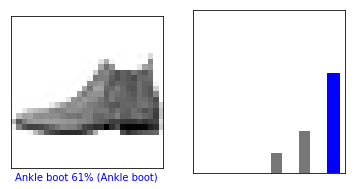

In [22]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

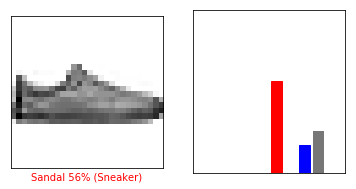

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

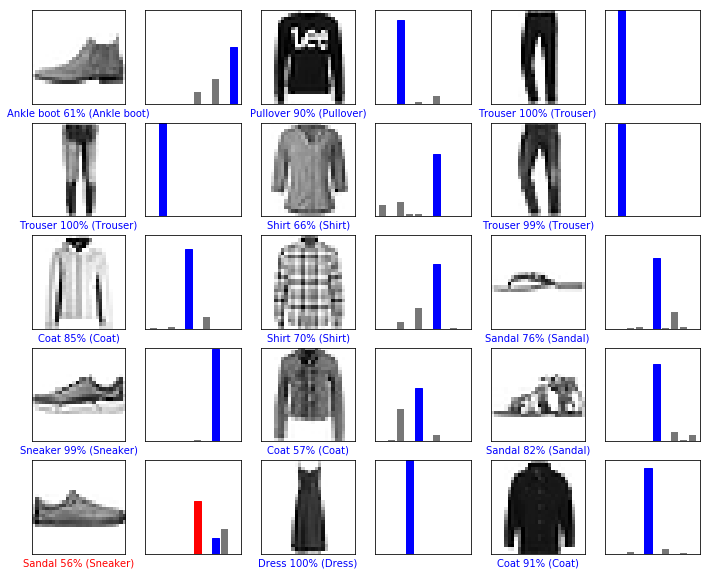

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

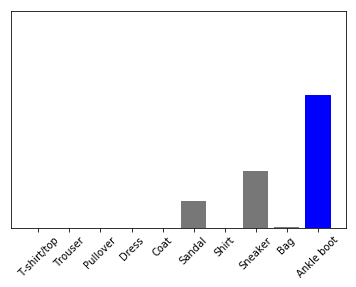

In [26]:
# Preform a single prediction on a single image
img = test_images[0] # Shpae is 28x28

# add the image to a batch where it is the only member
img = (np.expand_dims(img, 0)) # new shape (1, 28, 28)

prediction_single = model.predict(img)
plot_value_array(0, prediction_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
